In [ ]:
# Notebook created by Jose Fernandez Navarro <jc.fernandez.navarro@gmail.com>
# The paths to the data folders need to be updated 
# The notebook generates boxplots and other QC measurements 

%matplotlib inline
from itertools import izip
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_saturation(sat, reads, genes, avg_reads, avg_genes, sample):
    for data, color in izip([reads,genes,avg_reads,avg_genes], 
                            ["blue", "red", "brown", "black"]):
        density = stats.kde.gaussian_kde(data)
        plt.plot(np.log10(sat), np.log10(data), c=color)
    plt.title(sample)
    plt.xlabel("Saturation points (reads log)")
    plt.ylabel("Saturation values (log)")
    lab0 = mpatches.Patch(color='blue', label='Reads')
    lab1 = mpatches.Patch(color='red', label='Genes')
    lab2 = mpatches.Patch(color='brown', label='Avg. reads')
    lab3 = mpatches.Patch(color='black', label='Avg. genes')
    plt.legend(handles=[lab0, lab1, lab2, lab3])
    plt.show()
    
# Saturation plot
sample = 'ID5_170817_E2'
sat = [200000, 371828, 838905, 2108553, 5559815, 14941315, 40442879]
reads = [193594, 350287, 737965, 1578195, 3040502, 5032199, 7388498]
genes = [12591, 13808, 15373, 16970, 18511, 19928, 21309]
avg_genes = [164.698698699, 285.043043043, 556.076923077, 1069.38861139, 1806.59580838, 2625.11976048, 3415.6251246]
avg_reads = []
plot_saturation(sat, reads, genes, avg_genes, avg_genes, sample)

# Saturation plot
sample = 'ID4_170627_E1'
sat = [200000, 371828, 838905, 2108553, 5559815, 14941315]
reads = [191540, 343688, 708196, 1451879, 2618845, 4039877]
genes = [12439, 13754, 15266, 16814, 18361, 19727]
avg_genes = [151.743743744, 259.771, 498.208208208, 926.853, 1500.626, 2091.58441558]
avg_reads = []
plot_saturation(sat, reads, genes, avg_genes, avg_genes, sample)

# Saturation plot
sample = 'ID4_170511_D1'
sat = [200000, 371828, 838905, 2108553, 5559815, 14941315, 40442879]
reads = [192470, 346592, 721605, 1504853, 2779259, 4382755, 6201970]
genes = [12416, 13721, 15250, 16815, 18348, 19766, 21215]
avg_genes = [153.660660661, 264.399399399, 513.658658659, 971.037037037, 1603.54, 2271.979, 2909.538]
avg_reads = []
plot_saturation(sat, reads, genes, avg_genes, avg_genes, sample)

# Saturation plot
sample = 'ID3_170605_D2'
sat = [200000, 371828, 838905, 2108553, 5559815, 14941315]
reads = [193104, 349141, 733502, 1575275, 3099953, 5319005]
genes = [12394, 13666, 15233, 16885, 18555, 20060]
avg_genes = [156.027027027, 269.671, 526.273273273, 1016.62862863, 1754.143, 2626.29170829]
avg_reads = []
plot_saturation(sat, reads, genes, avg_genes, avg_genes, sample)

# Saturation plot
sample = 'ID3_170605_C2'
sat = [200000, 371828, 838905, 2108553, 5559815, 14941315, 40442879]
reads = [189623, 338267, 690844, 1402293, 2565629, 4115402, 5874202]
genes = [12361, 13662, 15160, 16857, 18324, 19750, 21029]
avg_genes = [149.741741742, 255.379379379, 485.938, 898.73, 1478.606, 2137.974, 2783.644]
avg_reads = [189.812812813, 338.605605606, 690.844, 1402.293, 2565.629, 4115.402, 5874.202]
plot_saturation(sat, reads, genes, avg_genes, avg_reads, sample)

In [2]:
%matplotlib inline
from itertools import izip
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def boxplot(data, names, title, xlabel, ylabel, filename):
    
    fig, ax1 = plt.subplots(figsize=(14, 10))
    fig.canvas.set_window_title(title)
    plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

    bp = plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

    ax1.set_axisbelow(True)
    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    # Now fill the boxes with desired colors
    boxColors = ['darkkhaki', 'royalblue']
    numBoxes = len(data)
    medians = list(range(numBoxes))
    for i in range(numBoxes):
        box = bp['boxes'][i]
        boxX = []
        boxY = []
        for j in range(5):
            boxX.append(box.get_xdata()[j])
            boxY.append(box.get_ydata()[j])
        boxCoords = list(zip(boxX, boxY))
        # Alternate between Dark Khaki and Royal Blue
        k = i % 2
        boxPolygon = Polygon(boxCoords, facecolor=boxColors[k])
        ax1.add_patch(boxPolygon)
        # Now draw the median lines back over what we just filled in
        med = bp['medians'][i]
        medianX = []
        medianY = []
        for j in range(2):
            medianX.append(med.get_xdata()[j])
            medianY.append(med.get_ydata()[j])
            plt.plot(medianX, medianY, 'k')
            medians[i] = medianY[0]
        # Finally, overplot the sample averages, with horizontal alignment
        # in the center of each box
        plt.plot([np.average(med.get_xdata())], [np.average(data[i])],
                 color='w', marker='*', markeredgecolor='k')
    
    ax1.set_xlim(0.5, numBoxes + 0.5)
    xtickNames = plt.setp(ax1, xticklabels=names)
    plt.setp(xtickNames, rotation=90, fontsize=6)
    plt.savefig(filename)
    plt.show()
    
def plot_density(x, y, xlab, ylab, main, filename):
    density = stats.kde.gaussian_kde(y)
    sns_plot = plt.plot(np.log10(x), np.log10(y), c="blue")
    plt.title(main)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    sns_plot.savefig(filename)
    plt.show()
    
def plot_marginal(x, y, xlab, ylab, main, filename):
    #sns.jointplot(x=np.asarray(x), y=np.asarray(y), kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
    #sns.jointplot(x=x, y=y, kind='hex', s=200, color='m', edgecolor="skyblue", linewidth=2)
    #sns.set(style="white", color_codes=True)
    sns_plot = sns.jointplot(x=np.asarray(x), y=np.asarray(y), kind='kde', color="skyblue")
    plt.title(main)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    sns_plot.savefig(filename)
    plt.show()
 
def plot_marginal_log(x, y, xlab, ylab, main, filename):
    #sns.jointplot(x=np.asarray(x), y=np.asarray(y), kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
    #sns.jointplot(x=x, y=y, kind='hex', s=200, color='m', edgecolor="skyblue", linewidth=2)
    #sns.set(style="white", color_codes=True)
    sns_plot = sns.jointplot(x=np.log1p(x), y=np.log1p(y), kind='kde', color="skyblue")
    plt.title(main)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    sns_plot.savefig(filename)
    plt.show()
    

In [4]:
samples = list()
depth = list()

import os
import glob
# Update this to the path wher the 2D sections are 
for dirpath in os.listdir("../raw_data_sections"):
    if dirpath.find("ID") != -1:
        samples.append(os.path.basename(os.path.normpath(dirpath)))
        log_file = glob.glob(os.path.join("../raw_data_sections",dirpath,"Data","*log.txt"))[0]
        with open(log_file, "r") as filehandler:
            for line in filehandler.readlines():
                if line.find("Trimming stats total reads (pair):") != -1:
                    depth.append(int(line.split()[-1]))
                    


In [5]:
import pandas as pd

# Update this to the path where the 3D atlas counts matrix and meta files are
counts = pd.read_table("../atlas/exprmat.tsv", sep="\t", header=0, index_col=0)
meta_sections = pd.read_table("../atlas/slicestable.tsv", sep="\t", header=0, index_col=0)
meta_spots = pd.read_table("../atlas/spotstable.tsv", sep="\t", header=0, index_col=0)

In [6]:
id_depth = dict()
for s,d in zip(samples,depth):
    id_depth[s] = d
ordered_depths = list()
for id in meta_sections["slice_old_id"]:
    ordered_depths.append(id_depth[id])
meta_sections = meta_sections.assign(seq_dep=ordered_depths)
meta_sections.to_csv("adj_slicestable.tsv", sep="\t")

In [7]:
genes_in = list()
reads_in = list()
import numpy as np

for id in meta_sections.index:
    counts_id = counts.loc[meta_spots[meta_spots["slice_index"] == id].index]
    aggregated_spot_counts = counts_id.sum(axis=1).values
    aggregated_gene_counts = (counts_id > 0).sum(axis=1).values
    max_genes_feature = aggregated_gene_counts.max()
    min_genes_feature = aggregated_gene_counts.min()
    max_reads_feature = aggregated_spot_counts.max()
    min_reads_feature = aggregated_spot_counts.min()
    average_reads_feature = np.mean(aggregated_spot_counts)
    average_genes_feature = np.mean(aggregated_gene_counts)
    reads_in.append([min_reads_feature, average_reads_feature, max_reads_feature])
    genes_in.append([min_genes_feature, average_genes_feature, max_genes_feature])

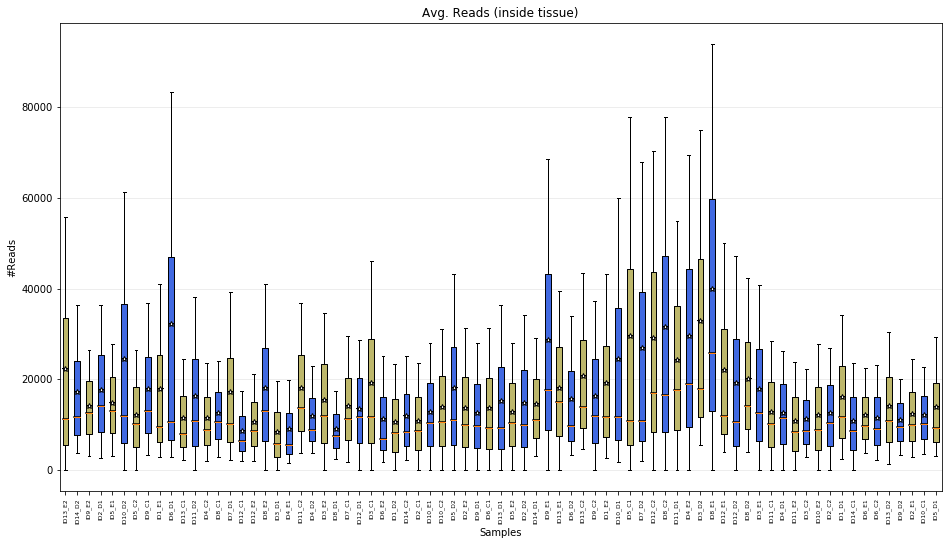

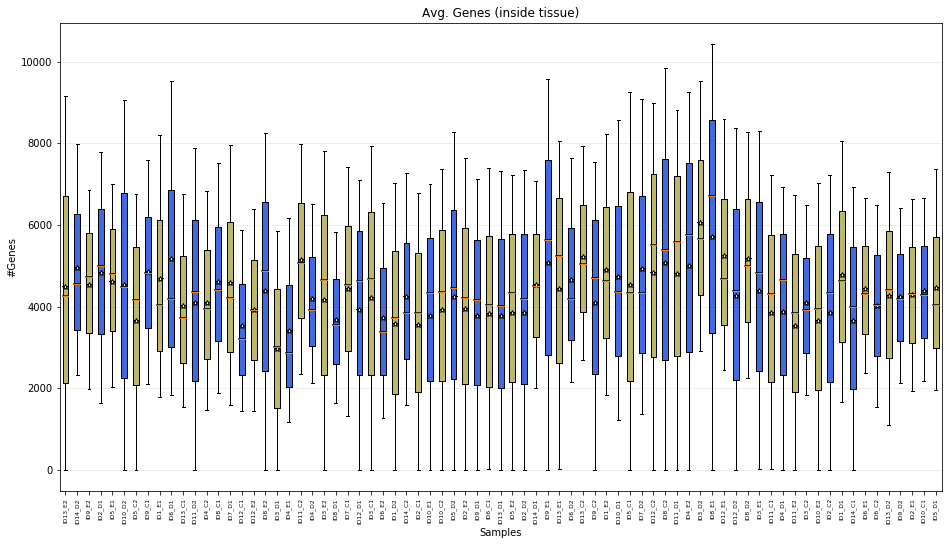

In [23]:
boxplot(reads_in, samples, "Avg. Reads (inside tissue)", "Samples", "#Reads", "box_plot_reads.pdf")
boxplot(genes_in, samples, "Avg. Genes (inside tissue)", "Samples", "#Genes", "box_plot_genes.pdf")

In [8]:
meta_spots = meta_spots.assign(seq_dep=np.zeros(meta_spots.shape[0]))
meta_spots = meta_spots.assign(animal=np.zeros(meta_spots.shape[0]))

for index, row in meta_sections.iterrows():
    meta_spots.loc[meta_spots["slice_index"] == index, "animal"] = row["animal"]
    meta_spots.loc[meta_spots["slice_index"] == index, "seq_dep"] = row["seq_dep"]

meta_spots.to_csv("spotstable_ext.tsv", sep="\t")


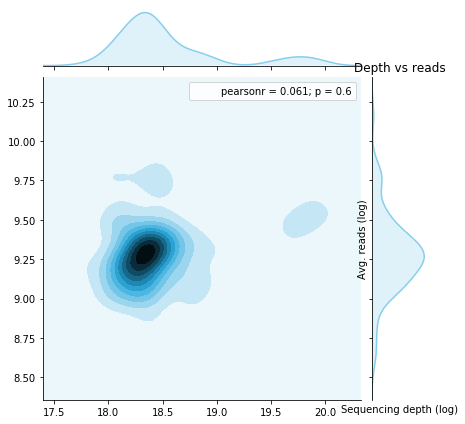

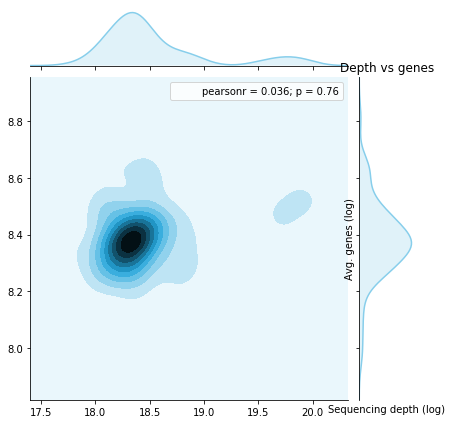

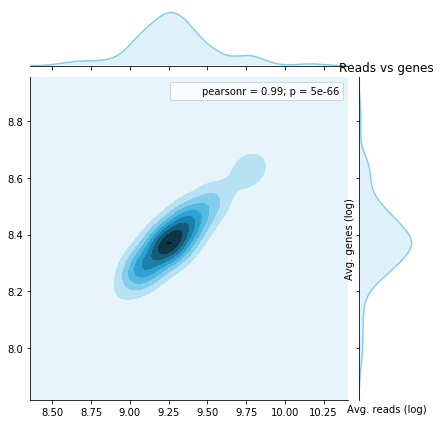

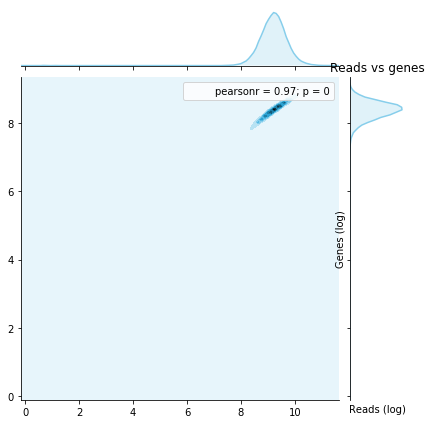

In [13]:
plot_marginal_log(ordered_depths, [x[1] for x in reads_in], "Sequencing depth (log)", "Avg. reads (log)", "Depth vs reads", "marginal_depth_vs_reads_log.pdf")
plot_marginal_log(ordered_depths, [x[1] for x in genes_in], "Sequencing depth (log)", "Avg. genes (log)", "Depth vs genes", "marginal_depth_vs_genes_log.pdf")
plot_marginal_log([x[1] for x in reads_in], [x[1] for x in genes_in], "Avg. reads (log)", "Avg. genes (log)", "Reads vs genes", "marginal_reads_vs_genes_log.pdf")

aggregated_spot_counts = counts.sum(axis=1).values
aggregated_gene_counts = (counts > 0).sum(axis=1).values
plot_marginal_log(aggregated_spot_counts, aggregated_gene_counts, "Reads (log)", "Genes (log)", "Reads vs genes", "marginal_total_reads_vs_genes_log.pdf")


In [17]:
cells_in = list()
cells_total = list()
for index, row in meta_sections.iterrows():
    sliced = meta_spots.loc[meta_spots["slice_index"] == index, "nuclei"]
    cells_in.append([sliced.min(), np.mean(sliced), sliced.max()])
    cells_total += sliced.tolist()

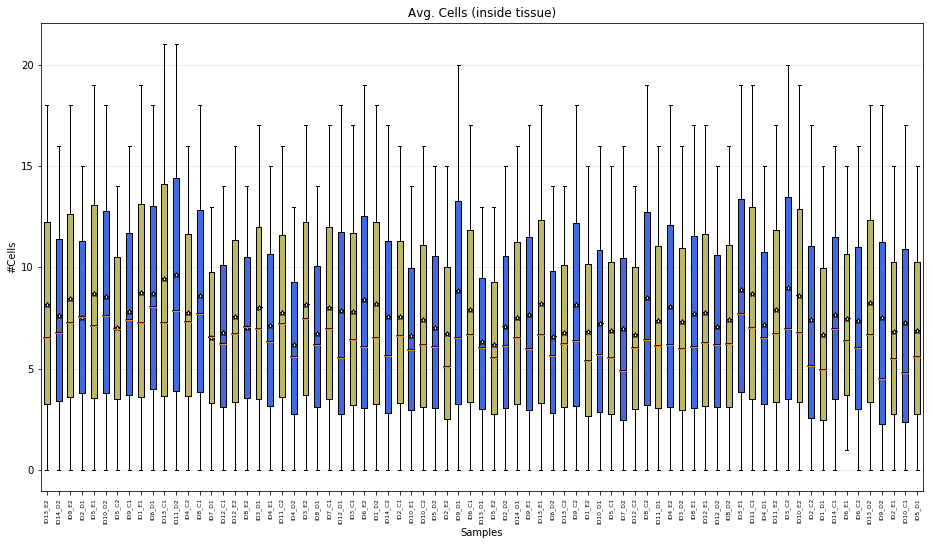

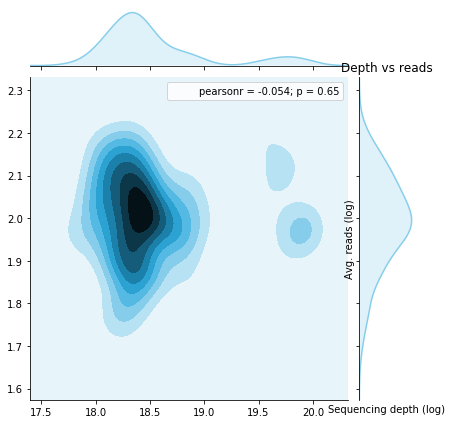

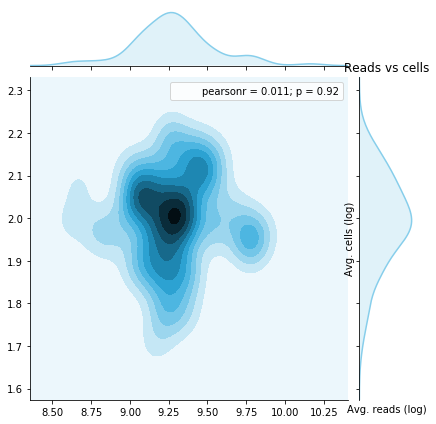

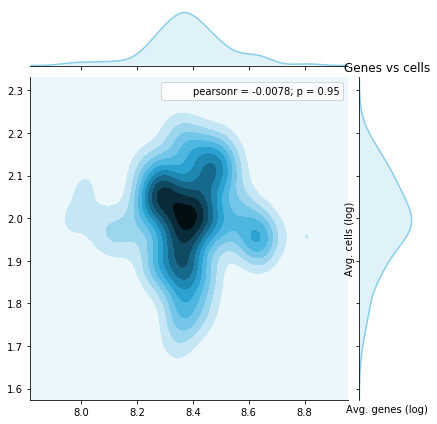

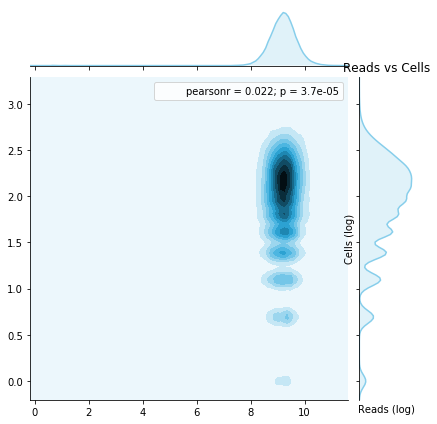

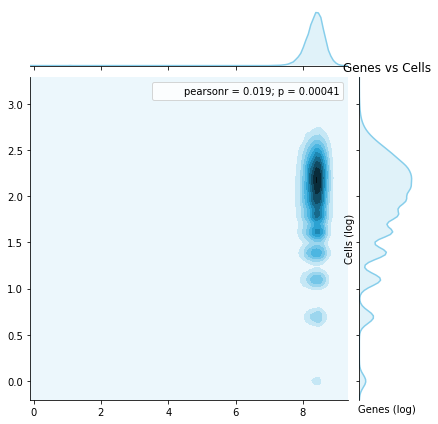

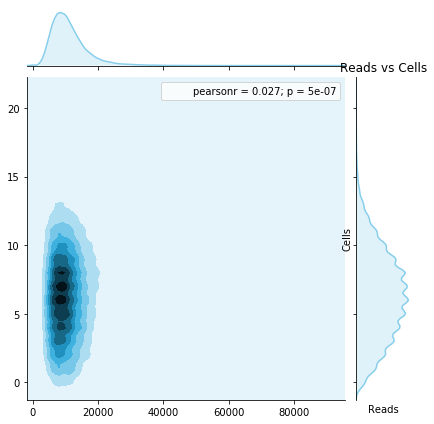

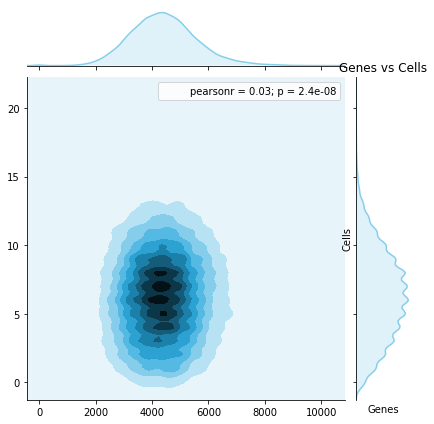

In [19]:
boxplot(cells_in, samples, "Avg. Cells (inside tissue)", "Samples", "#Cells", "box_plot_cells.pdf")

plot_marginal_log(ordered_depths, [x[1] for x in cells_in], "Sequencing depth (log)", "Avg. reads (log)", "Depth vs reads", "marginal_cells_vs_reads_log.pdf")
plot_marginal_log([x[1] for x in reads_in], [x[1] for x in cells_in], "Avg. reads (log)", "Avg. cells (log)", "Reads vs cells", "marginal_reads_vs_cells_log.pdf")
plot_marginal_log([x[1] for x in genes_in], [x[1] for x in cells_in], "Avg. genes (log)", "Avg. cells (log)", "Genes vs cells", "marginal_genes_vs_cells_log.pdf")

plot_marginal_log(aggregated_spot_counts, cells_total, "Reads (log)", "Cells (log)", "Reads vs Cells", "marginal_total_reads_vs_cells_log.pdf")
plot_marginal_log(aggregated_gene_counts, cells_total, "Genes (log)", "Cells (log)", "Genes vs Cells", "marginal_total_genes_vs_cells_log.pdf")